<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
%matplotlib inline

In [2]:
from pathlib import Path

In [4]:
basedir = Path("C:\Users\Zade\Desktop\HonorsMaterials\ForTask1\p4_analysis\P4_catalog_v1.0\")

SyntaxError: EOL while scanning string literal (<ipython-input-4-6a4cd7562826>, line 1)

In [28]:
basedir = Path("/Users/klay6683/Dropbox/data/planet4/p4_for_Zade/P4_catalog_v1.1/")

In [30]:
blotch = pd.read_csv( basedir / "P4_catalog_v1.1_L1C_cut_0.5_blotch.csv")

In [31]:
blotch.head()#check that it loaded

,marking_id,angle,tile_id,image_x,image_y,n_votes,obsid,radius_1,radius_2,vote_ratio,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
0,B000000,2.28,APF0000cia,3330.27,5573.00,4,ESP_012079_0945,22.13,15.78,1.00,...,0.10,214.785,0.25,126.856883,-67.239204,257.001479,-3370.630963,-85.493625,-85.546304,104.661641
1,B000001,1.38,APF0000cia,3593.60,5706.40,5,ESP_012079_0945,25.55,15.73,0.55,...,0.05,214.785,0.25,126.856883,-67.166591,257.008699,-3370.633997,-85.493821,-85.546498,104.646095
2,B000004,7.16,APF0000cic,98.10,34394.70,10,ESP_012079_0945,84.54,48.33,1.00,...,0.18,214.785,0.25,126.856883,-65.402430,263.908435,-3370.353989,-85.387847,-85.441752,103.918757
3,B000005,81.00,APF0000cic,825.58,34203.38,8,ESP_012079_0945,51.92,35.12,1.00,...,0.97,214.785,0.25,126.856883,-65.252200,263.799557,-3370.366323,-85.390259,-85.444136,103.893535
4,B000006,14.66,APF0000cic,152.67,34155.33,3,ESP_012079_0945,184.94,71.25,1.00,...,0.25,214.785,0.25,126.856883,-65.411364,263.848867,-3370.358955,-85.388794,-85.442688,103.923605


In [33]:
fans = pd.read_csv( basedir / "P4_catalog_v1.1_L1C_cut_0.5_fan.csv")

In [34]:
mixed = pd.concat([blotch, fans], ignore_index=True, sort=False)

In [35]:
mixed.index.is_unique #can prevent w/ concat options ignore_index=True

True

In [36]:
group_fan = fans.groupby("obsid")
group_blotch = blotch.groupby("obsid")
fcl = group_fan.marking_id.count() #this is the same as group_fan.size()
bcl = group_blotch.marking_id.count() #this is the same as group_blotch.size()
#keys are obsids, values are the data frames for each object (n_votes, radii, l_s, etc)

In [8]:
#visualizing the data frames
#for obsid, obsid_df in group_fan:
#    print(obsid)
#    print(obsid_df)

In [9]:
#visualizing the data frames
#group_fan.get_group('ESP_011296_0975').head

In [10]:
#bcl.loc['ESP_011296_0975'] 

In [11]:
#group_fan.describe()

In [37]:
bcl.head()

obsid
ESP_011296_0975    1014
ESP_011341_0980     283
ESP_011348_0950     195
ESP_011350_0945     625
ESP_011351_0945    1167
Name: marking_id, dtype: int64

In [38]:
fcl.head()

obsid
ESP_011296_0975    4472
ESP_011341_0980     455
ESP_011348_0950       4
ESP_011350_0945    1107
ESP_011351_0945    1636
Name: marking_id, dtype: int64

In [39]:
bcl.head()

obsid
ESP_011296_0975    1014
ESP_011341_0980     283
ESP_011348_0950     195
ESP_011350_0945     625
ESP_011351_0945    1167
Name: marking_id, dtype: int64

In [40]:
group_mix = mixed.groupby('obsid')
mcl = group_mix.marking_id.count() #=group_mix.size()

In [41]:
mcl.head()

obsid
ESP_011296_0975    5486
ESP_011341_0980     738
ESP_011348_0950     199
ESP_011350_0945    1732
ESP_011351_0945    2803
Name: marking_id, dtype: int64

In [42]:
mcl.values.max()

20923

In [43]:
mcl.values.min()

21

In [44]:
littleblotch=blotch.head(100)

In [45]:
littlefans=fans.head(100)

In [46]:
littlemix=mixed.head(100)

In [47]:
fans.index

RangeIndex(start=0, stop=158476, step=1)

In [48]:
fans.index.is_unique

True

In [49]:
fans.marking_id.nunique()

158476

In [50]:
fans.shape

(158476, 24)

In [51]:
fans.duplicated().value_counts()

False    158476
dtype: int64

In [52]:
fans.marking_id.duplicated().value_counts()

False    158476
Name: marking_id, dtype: int64

In [27]:
#fans[fans.marking_id.duplicated()]    

In [30]:
#littlemix.pivot(index='marking_id', columns='obsid', values='l_s') #this line doesn't work, would be nice to make smaller data
#to test pivoting 

In [59]:
mcl.head(1)

obsid
ESP_011296_0975    5486
Name: marking_id, dtype: int64

In [61]:
fcl.head(1)

obsid
ESP_011296_0975    4472
Name: marking_id, dtype: int64

In [62]:
bcl.head(1)

obsid
ESP_011296_0975    1014
Name: marking_id, dtype: int64

In [63]:
1014+4472

5486

In [66]:
mcl.head()

obsid
ESP_011296_0975    5486
ESP_011341_0980     738
ESP_011348_0950     199
ESP_011350_0945    1732
ESP_011351_0945    2803
Name: marking_id, dtype: int64

In [68]:
mcl = mcl.to_frame()

In [69]:
mcl.head()

,marking_id
obsid,
ESP_011296_0975,5486
ESP_011341_0980,738
ESP_011348_0950,199
ESP_011350_0945,1732
ESP_011351_0945,2803


In [70]:
mixed.columns

Index(['marking_id', 'angle', 'tile_id', 'image_x', 'image_y', 'n_votes',
       'obsid', 'radius_1', 'radius_2', 'vote_ratio', 'x', 'y', 'x_angle',
       'y_angle', 'l_s', 'map_scale', 'north_azimuth', 'BodyFixedCoordinateX',
       'BodyFixedCoordinateY', 'BodyFixedCoordinateZ',
       'PlanetocentricLatitude', 'PlanetographicLatitude', 'Longitude',
       'distance', 'spread', 'version'],
      dtype='object')

In [71]:
mixed.shape

(408277, 26)

In [75]:
mixed.l_s.head()

0    214.785
1    214.785
2    214.785
3    214.785
4    214.785
Name: l_s, dtype: float64

In [91]:
l_s_vs_obsid = mixed.drop_duplicates(subset='obsid').set_index('obsid').l_s

In [97]:
mcl = mcl.join(l_s_vs_obsid)

In [98]:
mcl.head()

,marking_id,l_s
obsid,,
ESP_011296_0975,5486,178.833
ESP_011341_0980,738,180.809
ESP_011348_0950,199,181.117
ESP_011350_0945,1732,181.205
ESP_011351_0945,2803,181.249


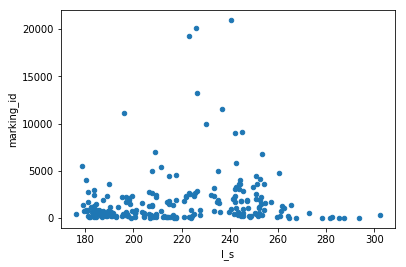

In [99]:
mcl.plot(kind='scatter', x='l_s', y='marking_id')

In [103]:
fcl = fcl.to_frame()

In [104]:
fcl['type'] = 'F'

In [105]:
fcl.head()

,marking_id,type
obsid,,
ESP_011296_0975,4472,F
ESP_011341_0980,455,F
ESP_011348_0950,4,F
ESP_011350_0945,1107,F
ESP_011351_0945,1636,F


In [106]:
bcl = bcl.to_frame()

In [107]:
bcl['type'] = 'B'

In [108]:
bcl.head()

,marking_id,type
obsid,,
ESP_011296_0975,1014,B
ESP_011341_0980,283,B
ESP_011348_0950,195,B
ESP_011350_0945,625,B
ESP_011351_0945,1167,B


In [109]:
mixed = pd.concat([fcl, bcl], sort=False)

In [110]:
mixed.head()

,marking_id,type
obsid,,
ESP_011296_0975,4472,F
ESP_011341_0980,455,F
ESP_011348_0950,4,F
ESP_011350_0945,1107,F
ESP_011351_0945,1636,F


In [113]:
mixed = mixed.join(l_s_vs_obsid)

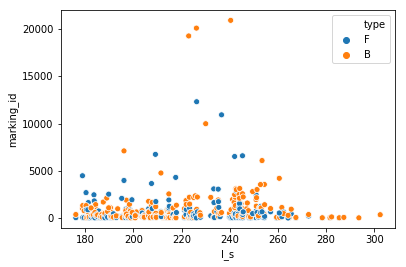

In [115]:
sns.scatterplot(data=mixed, y='marking_id', x='l_s', hue='type')

In [116]:
import os

In [120]:
os.environ["USER"]

'klay6683'

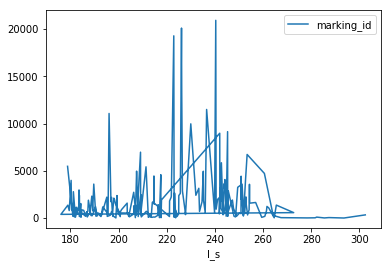

In [100]:
mcl.plot(x='l_s', y='marking_id')

True

In [81]:
mcl.merge(mixed[['l_s', 'obsid']], on='obsid')

,obsid,marking_id,l_s
0,ESP_011296_0975,5486,178.833
1,ESP_011296_0975,5486,178.833
2,ESP_011296_0975,5486,178.833
3,ESP_011296_0975,5486,178.833
4,ESP_011296_0975,5486,178.833
5,ESP_011296_0975,5486,178.833
6,ESP_011296_0975,5486,178.833
7,ESP_011296_0975,5486,178.833
8,ESP_011296_0975,5486,178.833
9,ESP_011296_0975,5486,178.833


In [73]:
mcl.dtypes

marking_id    int64
dtype: object

In [74]:
mcl.join?

In [32]:
oldmcl=group_mix.l_s.count()

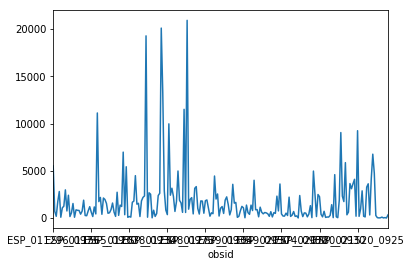

In [33]:
oldmcl[0:].plot()#plot of obsid vs #obj/l_s

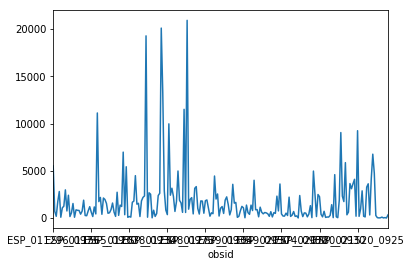

In [34]:
mcl[0:].plot() #plot of markingID vs #of objects total

In [35]:
#sns.barplot(x = 'obsid', y='l_s', data = mixed)

In [36]:
print littleblotch.l_s.max()
print littleblotch.l_s.min()

214.785
214.785


In [37]:
fans.l_s.max()
fans.l_s.min()

176.07499999999999

In [38]:
fans.head()

,angle,distance,tile_id,image_x,image_y,marking_id,n_votes,obsid,spread,version,...,y_angle,l_s,north_azimuth,map_scale,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude
0,205.56,179.71,APF0000ci9,2270.76,24336.16,F000000,35,ESP_012079_0945,88.03,1,...,-0.43,214.785,126.856883,1.0,-65.804336,261.407884,-3370.504345,-85.427383,-85.480830,104.129523
1,185.39,179.62,APF0000cia,3391.21,5640.60,F000001,15,ESP_012079_0945,21.35,1,...,-0.09,214.785,126.856883,1.0,-67.219114,257.011589,-3370.631413,-85.493546,-85.546226,104.656897
2,184.98,500.27,APF0000cia,3509.96,5876.70,F000002,10,ESP_012079_0945,18.91,1,...,-0.09,214.785,126.856883,1.0,-67.170611,257.055226,-3370.630794,-85.493039,-85.545725,104.644396
3,184.29,105.43,APF0000cia,3716.27,5824.50,F000004,6,ESP_012079_0945,26.41,1,...,-0.07,214.785,126.856883,1.0,-67.127761,257.024926,-3370.635002,-85.493723,-85.546401,104.637107
4,189.42,109.50,APF0000cia,3452.17,6033.00,F000005,3,ESP_012079_0945,22.58,1,...,-0.16,214.785,126.856883,1.0,-67.169940,257.096267,-3370.628302,-85.492368,-85.545061,104.642019


In [39]:
littlefans.tile_id.nunique()

39

In [40]:
littlefans.l_s.nunique()

1

In [41]:
fans.obsid.nunique()

215

In [42]:
fcl.head()

obsid
ESP_011296_0975    4496
ESP_011341_0980     455
ESP_011348_0950       4
ESP_011350_0945    1117
ESP_011351_0945    1647
Name: marking_id, dtype: int64

In [ ]:
sns.barplot (y = 'obsid', data = fans)

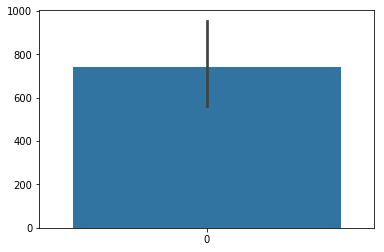

In [52]:
sns.barplot(data = fcl)

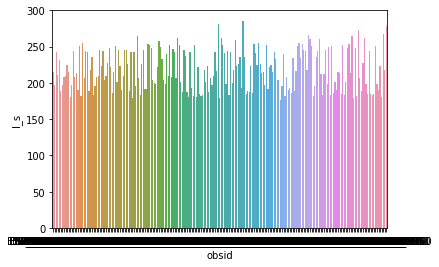

In [45]:
#not quite what I want though, want to group by obsid to plot #things vs. l_s, using obsid as a proxy for l_s since it's not float
sns.barplot(x = 'obsid', y = 'l_s', data = fans)

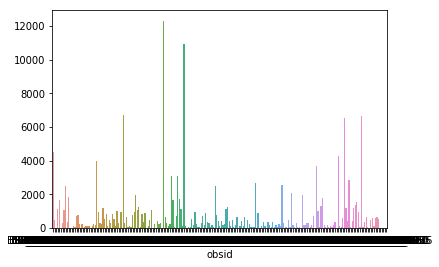

In [65]:
#I think this is what we want?
#if it is, find out how to rename the x-axis while still keeping values/bins
sns.barplot(group_fan.size().index, group_fan.size().values)

In [67]:
print group_fan.size().max()
print group_fan.size().min()

12322
1


In [68]:
mixed.head()

,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,PositiveEast360Longitude,angle,distance,image_x,image_y,...,radius_1,radius_2,spread,tile_id,version,vote_ratio,x,x_angle,y,y_angle
0,-67.239204,257.001479,-3370.630963,-85.493625,-85.546304,104.661641,2.28,NaN,3330.27,5573.00,...,22.13,15.78,NaN,APF0000cia,NaN,1.00,370.27,0.50,93.00,0.10
1,-67.166591,257.008699,-3370.633997,-85.493821,-85.546498,104.646095,1.38,NaN,3593.60,5706.40,...,25.55,15.73,NaN,APF0000cia,NaN,0.55,633.60,0.20,226.40,0.05
2,-65.402430,263.908435,-3370.353988,-85.387847,-85.441752,103.918757,7.16,NaN,98.10,34394.70,...,84.54,48.33,NaN,APF0000cic,NaN,1.00,98.10,0.58,418.70,0.18
3,-65.252200,263.799557,-3370.366324,-85.390258,-85.444136,103.893534,81.00,NaN,825.58,34203.38,...,51.92,35.12,NaN,APF0000cic,NaN,1.00,825.58,0.16,227.38,0.97
4,-65.411364,263.848868,-3370.358955,-85.388794,-85.442688,103.923605,14.66,NaN,152.67,34155.33,...,184.94,71.25,NaN,APF0000cic,NaN,1.00,152.67,0.93,179.33,0.25


In [89]:
#Can also read out first letter of marking ID as it's either an F or a B.  
#marking_id.str or little function with lambda trick from last meeting; marking_id.map(lambda x : x[0])  
#This returns first character in each marking_id, returns either F or B
#fans.marking_id.map(lambda x : x[0])
#blotch.marking_id.map(lambda x : x[0])
print mixed.marking_id.map(lambda x : x[0]).head()
print mixed.marking_id.map(lambda x : x[0]).tail()
identify_type = mixed.marking_id.map(lambda x : x[0])

0    B
1    B
2    B
3    B
4    B
Name: marking_id, dtype: object
409637    F
409638    F
409639    F
409640    F
409641    F
Name: marking_id, dtype: object


In [73]:
group_mixed = mixed.groupby('obsid')

In [92]:
#need to figure out how to do hue stuff, trying lambda trick but dont know how to incorporate into my graph here
sns.barplot(group_mixed.size().index, group_mixed.size().values, hue = identify_type)

ValueError: Grouper and axis must be same length